# K Neighbors Classifier

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
from Image_Processing_Functions import *

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
# Load dataset
dataset_dir = 'dataset'
images1,labels= image_pipeline_with_resize(dataset_dir,128,64)
images2=RGB_to_grayscale(images1)
images=Image_scalling(images2)

Error processing dataset/0/.ipynb_checkpoints: [Errno 13] Permission denied: 'dataset/0/.ipynb_checkpoints'
Error processing dataset/1/.ipynb_checkpoints: [Errno 13] Permission denied: 'dataset/1/.ipynb_checkpoints'


In [6]:
print(len(labels))

600


In [7]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



In [8]:
# Feature extraction using HOG
X_train_features = HOG_extract_features(X_train)
X_test_features = HOG_extract_features(X_test)


# K Neighbors Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
clf = KNeighborsClassifier()
history3 = clf.fit(X_train_features, y_train)
# Predict labels for test set
y_pred = clf.predict(X_test_features)


In [10]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8083333333333333


In [11]:
precision = precision_score(y_test, y_pred, pos_label='1')
print(precision)

0.8888888888888888


In [12]:
recall = recall_score(y_test, y_pred, pos_label='0')
print(recall)

0.9193548387096774


In [13]:
f1 = f1_score(y_test, y_pred, pos_label='0')
print(f1)

0.8321167883211679


In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[57  5]
 [18 40]]


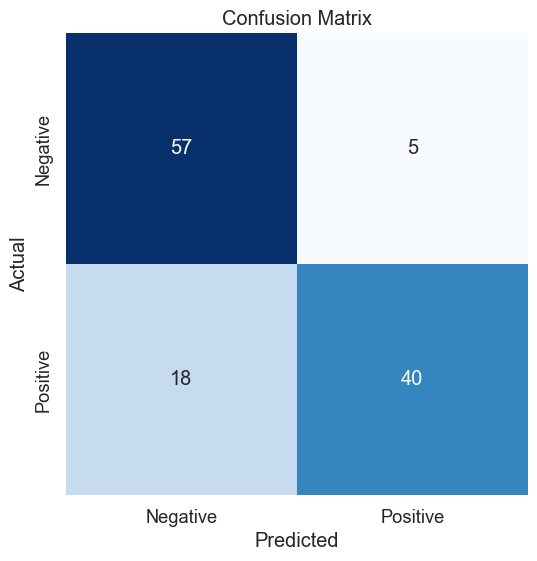

In [15]:
# Plot confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()